<a href="https://colab.research.google.com/github/mkosaka1/Speech_Emotion_Recognition/blob/master/4.%20Transfer_Learning%20-%20Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling2D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns
from keras.utils import to_categorical
from glob import glob
import cv2
from sklearn.utils import shuffle


In [129]:
# READ IN AUDIO FILES 
audio = "/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/"

In [130]:
dicts={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [131]:
path_main=audio

In [132]:
folders_main=os.listdir(path_main)

FileNotFoundError: ignored

# Log-Mel Spectrogram

In [ ]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)

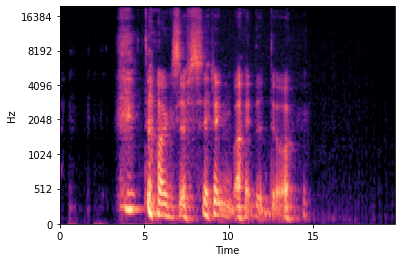

In [ ]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');


In [ ]:
import re
counter=0
for folders in folders_main :
    path_in='/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/Users/murielkosaka/Desktop/capstone_project/audio/sorted_data/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

# Noise

In [ ]:
# FUNCTION TO ADD WHITE NOISE
def noise(y):
    noise_amp = 0.05*np.random.uniform()*np.amax(y)   
    y = y.astype('float64') + noise_amp * np.random.normal(size=y.shape[0])
    return y

In [ ]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)

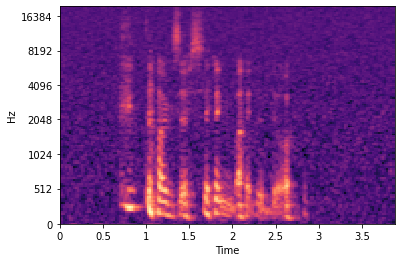

In [ ]:
y = noise(y)
y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
db_spec = librosa.power_to_db(y)
librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');

In [ ]:
import re
counter=0
for folders in folders_main :
    path_in='/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/Users/murielkosaka/Desktop/capstone_project/audio/noise/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y = noise(y)
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

# Stretch

In [ ]:
# FUNCTION TO STRETCH THE SOUND
def stretch(y, rate=0.8):
    data = librosa.effects.time_stretch(y, rate)
    return data

In [ ]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)

In [ ]:
y=yt

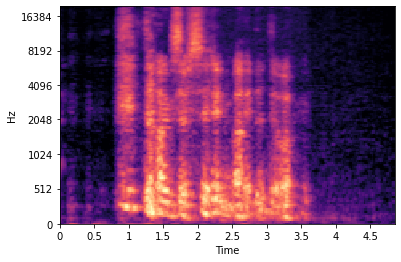

In [ ]:
y= stretch(y)
y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
db_spec = librosa.power_to_db(y)
librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');

16 angry
16 fearful
16 fearful
16 angry
16 disgust
16 sad
16 sad
16 disgust
16 surprised
16 surprised
16 happy
16 happy
16 calm
16 neutral
16 calm
16 happy
16 happy
16 calm
16 calm
16 neutral
16 fearful
16 angry
16 angry
16 fearful
16 sad
16 disgust
16 disgust
16 sad
16 surprised
16 surprised
16 calm
16 neutral
16 calm
16 happy
16 happy
16 disgust
16 sad
16 sad
16 disgust
16 angry
16 fearful
16 fearful
16 angry
16 surprised
16 surprised
16 sad
16 disgust
16 disgust
16 sad
16 fearful
16 angry
16 angry
16 fearful
16 surprised
16 surprised
16 neutral
16 calm
16 calm
16 happy
16 happy
11 neutral
11 calm
11 calm
11 happy
11 happy
11 sad
11 disgust
11 disgust
11 sad
11 fearful
11 angry
11 angry
11 fearful
11 surprised
11 surprised
11 disgust
11 sad
11 sad
11 disgust
11 angry
11 fearful
11 fearful
11 angry
11 surprised
11 surprised
11 calm
11 neutral
11 calm
11 happy
11 happy
11 fearful
11 angry
11 angry
11 fearful
11 sad
11 disgust
11 disgust
11 sad
11 surprised
11 surprised
11 happy
11 happ

15 neutral
15 calm
15 happy
15 happy
23 disgust
23 sad
23 sad
23 disgust
23 angry
23 fearful
23 fearful
23 angry
23 surprised
23 surprised
23 calm
23 neutral
23 calm
23 happy
23 happy
23 neutral
23 calm
23 calm
23 happy
23 happy
23 sad
23 disgust
23 disgust
23 sad
23 fearful
23 angry
23 angry
23 fearful
23 surprised
23 surprised
23 happy
23 happy
23 calm
23 neutral
23 calm
23 angry
23 fearful
23 fearful
23 angry
23 disgust
23 sad
23 sad
23 disgust
23 surprised
23 surprised
23 fearful
23 angry
23 angry
23 fearful
23 sad
23 disgust
23 disgust
23 sad
23 surprised
23 surprised
23 happy
23 happy
23 calm
23 calm
23 neutral
24 happy
24 happy
24 calm
24 calm
24 neutral
24 fearful
24 angry
24 angry
24 fearful
24 sad
24 disgust
24 disgust
24 sad
24 surprised
24 surprised
24 angry
24 fearful
24 fearful
24 angry
24 disgust
24 sad
24 sad
24 disgust
24 surprised
24 surprised
24 happy
24 happy
24 calm
24 neutral
24 calm
24 sad
24 disgust
24 disgust
24 sad
24 fearful
24 angry
24 angry
24 fearful
24 su

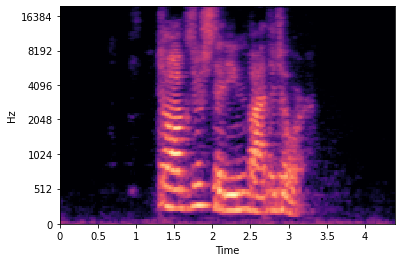

In [ ]:
import re
counter=0
for folders in folders_main :
    path_in='/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/Users/murielkosaka/Desktop/capstone_project/audio/stretch/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y= stretch(y)
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

# Speed N Pitch

In [ ]:
fname = audio + 'Actor_09/03-01-04-02-02-02-09.wav'  
y, sr = librosa.load(fname)
yt,_=librosa.effects.trim(y)

In [ ]:
y=yt

In [ ]:
# FUNCTION TO INCREASE SPEED AND PITCH 
def speedNpitch(y):
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.4  / length_change 
    tmp = np.interp(np.arange(0,len(y),speed_fac),np.arange(0,len(y)),y)
    minlen = min(y.shape[0], tmp.shape[0])
    y *= 0
    y[0:minlen] = tmp[0:minlen]
    return y

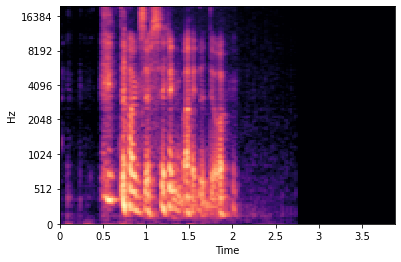

In [ ]:
y= speedNpitch(y)
y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
db_spec = librosa.power_to_db(y)
librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');

In [ ]:
import re
counter=0
for folders in folders_main :
    path_in='/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/Users/murielkosaka/Desktop/capstone_project/audio/speednpitch/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y= speedNpitch(y)
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

In [ ]:
import re
counter=0
for folders in folders_main :
    path_in='/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/{0}'.format(folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print (numbers[6],emotion)
        path_save='/Users/murielkosaka/Desktop/capstone_project/audio/speednpitch/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        y= speedNpitch(y)
        y = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
        db_spec = librosa.power_to_db(y)
        librosa.display.specshow(db_spec, y_axis='mel', fmax=20000, x_axis='time');
        plt.savefig(path_save)

# Transfer Learning

## Attach labels to Stretch

In [133]:
def get_images(directory):
    Images = []
    Labels = []  
    label = 0
    
    for labels in os.listdir(directory): 
        if labels == 'angry': 
            label = 'angry'
        elif labels == 'calm':
            label = 'calm'
        elif labels == 'disgust':
            label = 'disgust'
        elif labels == 'fearful':
            label = 'fearful'
        elif labels == 'happy':
            label = 'happy'
        elif labels == 'neutral':
            label = 'neutral'
        elif labels == 'sad':
            label = 'sad'
        elif labels == 'surprised':
            label = 'surprised'
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(75,75)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            # image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=200) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {'angry':'angry', 'calm':'calm', 'disgust':'disgust', 'fearful':'fearful', 'happy':'happy', 'neutral':'neutral','sad':'sad','surprised':'surprised'}
    
    return labels[class_code]

In [134]:
Images, Labels = get_images('/content/drive/My Drive/stretch/') #Extract the training images from the folders.


FileNotFoundError: ignored

# Process Images for Transfer Learning

In [135]:
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(Images, Labels, test_size=0.3,random_state=22, stratify=Labels)
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.3,random_state=22,stratify=y_model)


NameError: ignored

In [ ]:
from keras.utils import np_utils, to_categorical

lb = LabelEncoder()

X_train=np.array(X_train)/255
# y_train = to_categorical(lb.fit_transform(y_train),num_classes=8)

X_test=np.array(X_test)/255
# y_test = to_categorical(lb.fit_transform(y_test),num_classes=8)

X_val=np.array(X_val)/255
# y_val = to_categorical(lb.fit_transform(y_val),num_classes=8)



y_val=np_utils.to_categorical(lb.fit_transform(y_val))
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
X_test.shape

(1728, 75, 75, 3)

In [ ]:
X_train.shape

(2822, 75, 75, 3)

In [ ]:
X_val.shape

(1210, 75, 75, 3)

In [ ]:
print(y_test)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(lb.classes_)

AttributeError: ignored

# VGG16

In [ ]:
from keras import applications

model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (75, 75, 3),pooling='avg')

In [ ]:
# freezing the layers 
for layer in model.layers[:17]:
    layer.trainable = False


#Adding custom Layers 

x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)

In [ ]:
predictions = Dense(8, activation="softmax")(x)

# creating the final model 
model_final = Model(inputs = model.input, outputs = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [ ]:
model_final.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)     

In [ ]:
history = model_final.fit(X_train,y_trainHot, batch_size=32,epochs= 10, validation_data= (X_val,y_valHot))


Epoch 1/10
89/89 [==============================] - 214s 2s/step - loss: 2.1124 - accuracy: 0.1269 - val_loss: 2.0691 - val_accuracy: 0.1207
Epoch 2/10
89/89 [==============================] - ETA: 0s - loss: 2.0703 - accuracy: 0.1396

KeyboardInterrupt: ignored

In [ ]:
60,55

In [ ]:
train_data_dir = "audio/data/train"
val_data_dir = "audio/data/validation"
test_data_dir = "audio/data/test"
category_names = sorted(os.listdir('audio/data/train/'))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = 'audio/data/train' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")


FileNotFoundError: ignored

In [ ]:
for subdir, dirs, files in os.walk('data/train'):
    for file in files:
        img_file = subdir + '/' + file
        image = load_img(img_file)
        plt.figure()
        plt.title(subdir)
        plt.imshow(image)
        break


In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
img_height, img_width = 224,224
conv_base = vgg16.VGG16(weights='imagenet', include_top=False, pooling='max', input_shape = (img_width, img_height, 3))


In [ ]:
for layer in conv_base.layers[:-13]:
    layer.trainable = False


In [ ]:
from tensorflow.python.keras import layers, models, Model, optimizers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(nb_categories, activation='softmax'))
model.summary()


In [ ]:
#Number of images to load at each iteration
batch_size = 32
# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255
)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)


In [ ]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

learning_rate = 5e-5
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])


In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              )

# New VGG16

Text(0.5, 1.0, 'Number of training images per category:')

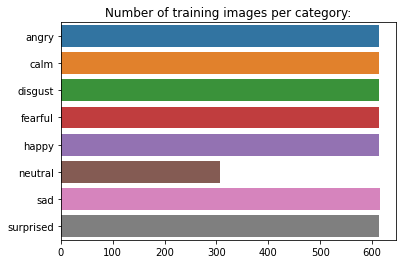

In [61]:
train_data_dir = "/content/drive/My Drive/data/train"
val_data_dir = "/content/drive/My Drive/data/validation"
test_data_dir = "/content/drive/My Drive/data/test"
category_names = sorted(os.listdir('/content/drive/My Drive/data/train'))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = '/content/drive/My Drive/data/train' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

In [62]:
for subdir, dirs, files in os.walk('data/train'):
    for file in files:
        img_file = subdir + '/' + file
        image = load_img(img_file)
        plt.figure()
        plt.title(subdir)
        plt.imshow(image)
        break

In [63]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
img_height, img_width = 224,224
conv_base = vgg16.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape = (img_width, img_height, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f4ec451e940> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f146b34e0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4f156fe6d8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4ec4058128> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4ec0417630> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4ec04204a8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4ec04208d0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4ec042a0f0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4ec042af28> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4ec04333c8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4ec0433c18> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4ec043c

In [ ]:
for layer in conv_base.layers[:-13]:
    layer.trainable = False

In [ ]:
from tensorflow.python.keras import layers, models, Model, optimizers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.25))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.25))
model.add(layers.Dense(nb_categories, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 4

In [138]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img

#Number of images to load at each iteration
batch_size = 32
# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255
)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
val_datagen =  ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = val_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 4605 images belonging to 8 classes.
Total number of images for "validation":
Found 585 images belonging to 8 classes.
Total number of images for "testing":
Found 570 images belonging to 8 classes.


In [ ]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

learning_rate = 5e-5
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=False, 
                              validation_data=val_generator,
                              )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
288/288 [==============================] - 2254s 8s/step - loss: 2.0790 - acc: 0.1338 - val_loss: 2.0624 - val_acc: 0.1333
Epoch 2/10
288/288 [==============================] - 80s 277ms/step - loss: 2.0650 - acc: 0.1299 - val_loss: 2.0695 - val_acc: 0.1470
Epoch 3/10
288/288 [==============================] - 80s 277ms/step - loss: 2.0361 - acc: 0.1613 - val_loss: 1.9316 - val_acc: 0.1709
Epoch 4/10
288/288 [==============================] - 80s 278ms/step - loss: 1.9310 - acc: 0.2450 - val_loss: 1.6827 - val_acc: 0.3470
Epoch 5/10
288/288 [==============================] - 80s 278ms/step - loss: 1.6828 - acc: 0.3516 - val_loss: 1.4740 - val_acc: 0.4034
Epoch 6/10
288/288 [==============================] - 80s 278ms/step - loss: 1.5178 - acc: 0.4063 - val_loss: 1.3480 - val_acc: 0.4855
Epoch 7/10
288/288 [==============================] - 80s 278ms/step - loss: 1.3461 - acc: 0.4814 - val_loss: 1.242

In [ ]:
79

79

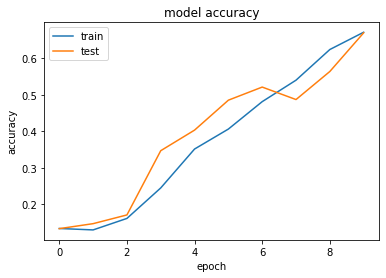

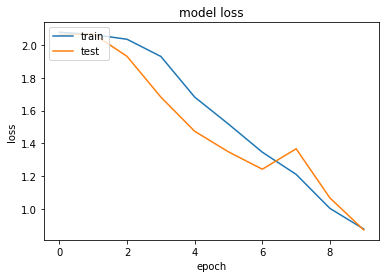

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete.jpg')


Instructions for updating:
Please use Model.predict, which supports generators.
Confusion matrix, without normalization


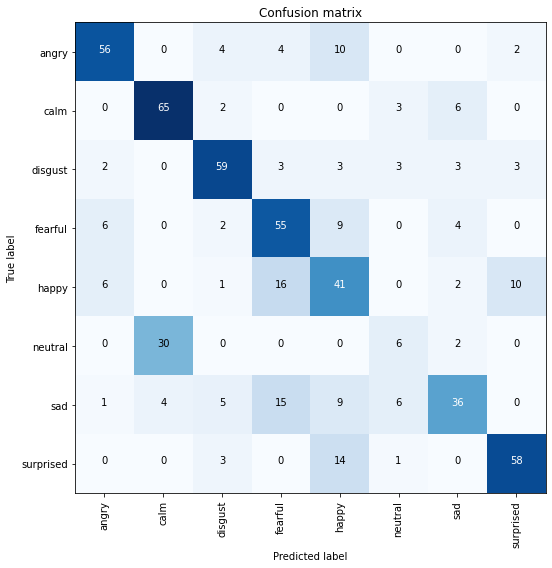

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
cmap=plt.cm.Blues
title='Confusion matrix'
classes = category_names
normalize=False
figname = 'Confusion_matrix_concrete.jpg'

def plot_confusion_matrix(cm, classes, figname, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print("Confusion matrix, without normalization")
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=cmap)
plt.title(title)
 #plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
fmt = ".2f" if normalize else "d"
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment="center",
  color="white" if cm[i, j] > thresh else "black")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.tight_layout()
  plt.savefig(figname)

In [ ]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 66.0% 


# Inception

In [11]:
from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

img_height, img_width = 224,224

imagenet=inception_v3.InceptionV3(weights='imagenet',pooling='avg',include_top=False, input_shape=(img_height, img_width,3))

In [12]:
for layer in imagenet.layers[:1]:
    layer.trainable=False

In [34]:
from tensorflow.python.keras import layers, models, Model, optimizers
model = models.Sequential()
model.add(imagenet)
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(nb_categories, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
dense_76 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_79 (Dense)             (None, 128)             

In [35]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

learning_rate = 5e-5
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [36]:
history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              )

Epoch 1/10
288/288 [==============================] - 44s 154ms/step - loss: 0.6193 - acc: 0.8421 - val_loss: 1.0160 - val_acc: 0.7248
Epoch 2/10
288/288 [==============================] - 42s 146ms/step - loss: 0.1818 - acc: 0.9472 - val_loss: 1.3900 - val_acc: 0.7094
Epoch 3/10
288/288 [==============================] - 43s 148ms/step - loss: 0.1824 - acc: 0.9494 - val_loss: 1.2624 - val_acc: 0.7248
Epoch 4/10
288/288 [==============================] - 42s 147ms/step - loss: 0.1187 - acc: 0.9672 - val_loss: 1.2081 - val_acc: 0.7316
Epoch 5/10
288/288 [==============================] - 42s 147ms/step - loss: 0.1055 - acc: 0.9672 - val_loss: 0.9748 - val_acc: 0.7795
Epoch 6/10
288/288 [==============================] - 42s 147ms/step - loss: 0.1083 - acc: 0.9683 - val_loss: 0.9189 - val_acc: 0.7778
Epoch 7/10
288/288 [==============================] - 42s 147ms/step - loss: 0.0864 - acc: 0.9763 - val_loss: 1.2408 - val_acc: 0.7316
Epoch 8/10
288/288 [==============================] - 4

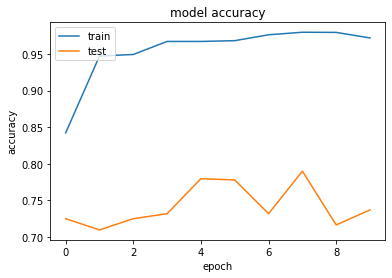

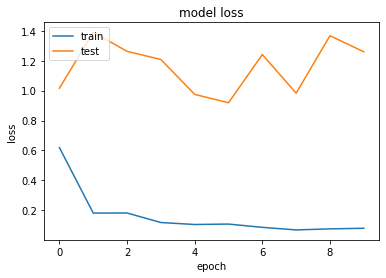

In [37]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete.jpg')


In [41]:
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
cmap=plt.cm.Blues
title='Confusion matrix'
classes = category_names
normalize=False
figname = 'Confusion_matrix_concrete.jpg'

def plot_confusion_matrix(cm, classes, figname, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print("Confusion matrix, without normalization")
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=cmap)
plt.title(title)
 #plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
fmt = ".2f" if normalize else "d"
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment="center",
  color="white" if cm[i, j] > thresh else "black")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.tight_layout()
  plt.savefig(figname)

NameError: ignored

<Figure size 576x576 with 0 Axes>

In [40]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
# plt.savefig('Augmented_Model_Confusion_Matrix.png')
plt.show()

NameError: ignored

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', normalize=False
                      , figname = 'Confusion_matrix_concrete.jpg')

Confusion matrix, without normalization


In [ ]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

NameError: ignored

# VGG19

In [159]:
from tensorflow.keras.applications import vgg19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import decode_predictions


In [160]:
img_height, img_width = 224,224
conv_base = vgg19.VGG19(weights='imagenet', include_top=False, pooling='avg', input_shape = (img_width, img_height, 3))

In [161]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [162]:
for layer in conv_base.layers[:-1]:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fa180d52cf8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa180cd9d68> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa180cd9e80> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fa180ce7be0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa180cd99e8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa19f10a048> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fa180ced668> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa19f8148d0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa180ce7dd8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa180cf58d0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fa180cf5b70> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fa180d05

In [163]:
for layer in conv_base.layers:
    layer.trainable = False

In [164]:
model = models.Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(nb_categories, activation='softmax'))
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
flatten_17 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_59 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_134 (Dense)            (None, 8)                 2056      
Total params: 20,157,768
Trainable params: 133,384
Non-trainable params: 20,024,384
_________________________________________________________________


In [165]:
learning_rate = 5e-5
epochs = 20
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=False, 
                              validation_data=val_generator,
                              )

Epoch 1/20
144/144 [==============================] - 27s 189ms/step - loss: 2.1023 - acc: 0.1359 - val_loss: 2.0514 - val_acc: 0.2000
Epoch 2/20
144/144 [==============================] - 27s 186ms/step - loss: 2.0798 - acc: 0.1470 - val_loss: 2.0383 - val_acc: 0.1795
Epoch 3/20
144/144 [==============================] - 27s 187ms/step - loss: 2.0640 - acc: 0.1590 - val_loss: 2.0225 - val_acc: 0.2667
Epoch 4/20
144/144 [==============================] - 27s 187ms/step - loss: 2.0472 - acc: 0.1659 - val_loss: 2.0076 - val_acc: 0.3316
Epoch 5/20
144/144 [==============================] - 27s 185ms/step - loss: 2.0364 - acc: 0.1813 - val_loss: 1.9959 - val_acc: 0.3145
Epoch 6/20
144/144 [==============================] - ETA: 0s - loss: 2.0183 - acc: 0.2009

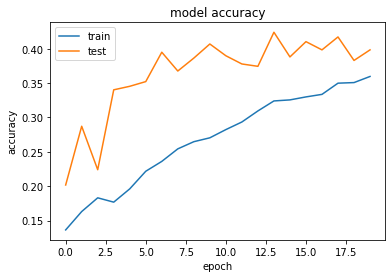

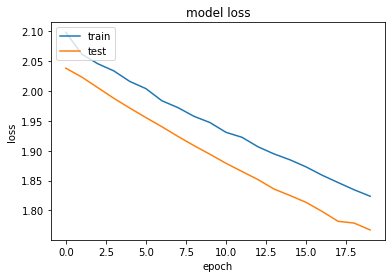

In [151]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [84]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete.jpg')


Instructions for updating:
Please use Model.predict, which supports generators.
Confusion matrix, without normalization


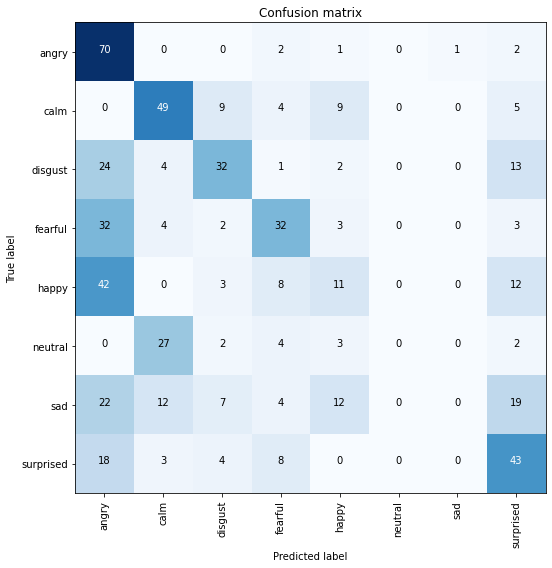

In [85]:
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
cmap=plt.cm.Blues
title='Confusion matrix'
classes = category_names
normalize=False
figname = 'Confusion_matrix_concrete.jpg'

def plot_confusion_matrix(cm, classes, figname, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print("Confusion matrix, without normalization")
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=cmap)
plt.title(title)
 #plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
fmt = ".2f" if normalize else "d"
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment="center",
  color="white" if cm[i, j] > thresh else "black")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.tight_layout()
  plt.savefig(figname)

In [ ]:
# example of loading the resnet50 model
from keras.applications.resnet50 import ResNet50
# load model
model = ResNet50()
# summarize the model
model.summary()